In [1]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1d", start="2021-01-01", end="2021-12-31")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-04 00:00:00-05:00,239.820007,248.163330,239.063339,243.256668,145914600,0.0,0.0
1,2021-01-05 00:00:00-05:00,241.220001,246.946671,239.733337,245.036667,96735600,0.0,0.0
2,2021-01-06 00:00:00-05:00,252.830002,258.000000,249.699997,251.993332,134100000,0.0,0.0
3,2021-01-07 00:00:00-05:00,259.209991,272.329987,258.399994,272.013336,154496700,0.0,0.0
4,2021-01-08 00:00:00-05:00,285.333344,294.829987,279.463318,293.339996,225166500,0.0,0.0


In [8]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data)
data = []
for table in soup.find_all("table"):
    
    if any(["GameStop Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")]):
        for row in table.find("tbody").find_all("tr"):
            date_col, rev_col = [col for col in row.find_all("td")]
            data.append({
                "Date": date_col.text,
                "Revenue": rev_col.text.replace("$", "").replace(",", "")
            })

gme_revenue = pd.DataFrame(data)
gme_revenue.tail()

""


In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(dataframe, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe['Date'], dataframe['Close'])
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Retrieve Tesla stock data using yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1d", start="2021-01-01", end="2021-12-31")

# Plot the Tesla stock graph
make_graph(tesla_data, "Tesla Stock Performance")

KeyError: 'Date'

<Figure size 1000x600 with 0 Axes>

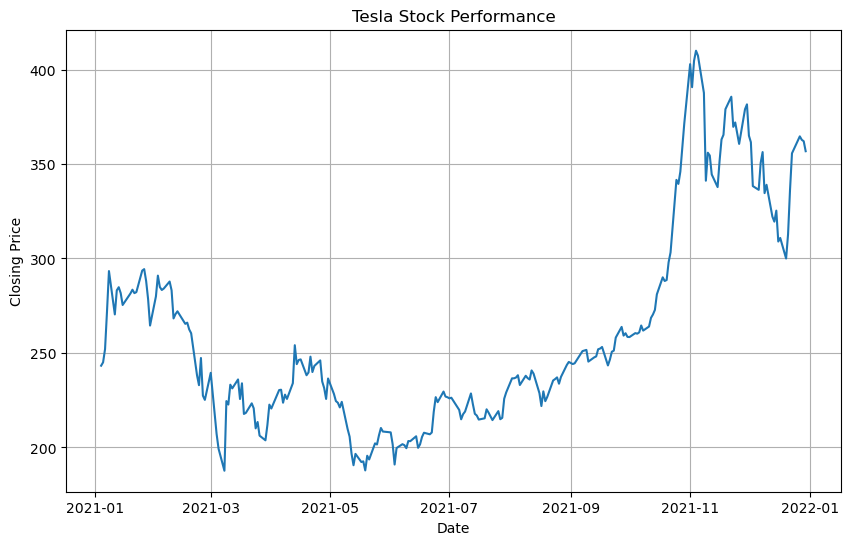

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
def make_graph(dataframe, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe['Date'], dataframe['Close'])
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(title)
    plt.grid(True)
    plt.show()
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1d", start="2021-01-01", end="2021-12-31")
tesla_data = tesla_data.reset_index()
make_graph(tesla_data, "Tesla Stock Performance")

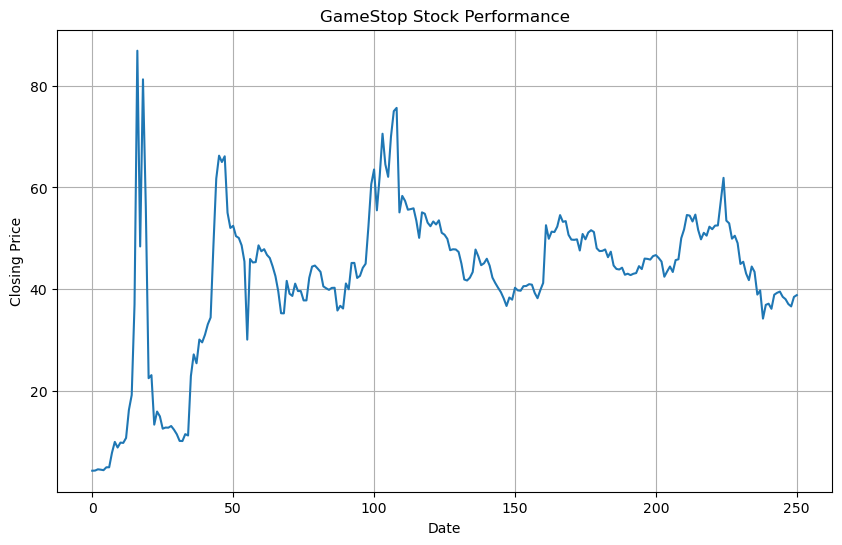

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
def make_graph(dataframe, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dataframe.index, dataframe['Close'])
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(title)
    plt.grid(True)
    plt.show()
gamestop = yf.Ticker("GME")
gamestop_data = gamestop.history(period="1d", start="2021-01-01", end="2021-12-31")
gamestop_data = gamestop_data.reset_index()
make_graph(gamestop_data, "GameStop Stock Performance")